<a href="https://colab.research.google.com/github/jlarson200/COVID-19-US-IMPACTS/blob/main/npl_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###DSCI 592 Team project based on a Kaggle Prediction Competition

###### The site details are: https://www.kaggle.com/c/nlp-getting-started/data

#####Natural Language Processing with Disaster Tweets
#####Predict which Tweets are about real disasters and which ones are not

## Initial Exploration of the Data

### Data Grab

In [1]:
from google.colab import drive
from google.colab import files

 
# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
 DSCI_592 = '/content/drive/My Drive/DSCI_592'
%cd {DSCI_592}
!ls
# https://stackoverflow.com/questions/54351852/accessing-shared-with-me-with-colab

/content/drive/.shortcut-targets-by-id/10-42_ifui6hlObPWvMMivdQwEFf6Vh43/DSCI_592
 Code   Data  'DSCI 592 Syllabus 2021.pdf'   Notes.gdoc   Papers


### Data Check

###### Checking the train data set and displaying the 50 first rows

In [3]:
import pandas as pd
df = pd.read_csv ('Data/train.csv')
df.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


##### The shape of the train data set is:

In [4]:
df.shape

(7613, 5)

#####The train data set column headers are:

In [5]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

#####The info of train data set displays 5 columns and the count of data included 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


#####The count of nulls by column is:

In [8]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

#####The count of keywords by targets 

This is to see if any of the keywords have unbalanced targets. For example Aftershock has 0 true disasters and Wreckage has 0 false disasters

In [9]:
pd.crosstab(columns = df.keyword, index = df.target,
                     margins=True, margins_name="Total")

keyword,ablaze,accident,aftershock,airplane%20accident,ambulance,annihilated,annihilation,apocalypse,armageddon,army,arson,arsonist,attack,attacked,avalanche,battle,bioterror,bioterrorism,blaze,blazing,bleeding,blew%20up,blight,blizzard,blood,bloody,blown%20up,body%20bag,body%20bagging,body%20bags,bomb,bombed,bombing,bridge%20collapse,buildings%20burning,buildings%20on%20fire,burned,burning,burning%20buildings,bush%20fires,...,storm,stretcher,structural%20failure,suicide%20bomb,suicide%20bomber,suicide%20bombing,sunk,survive,survived,survivors,terrorism,terrorist,threat,thunder,thunderstorm,tornado,tragedy,trapped,trauma,traumatised,trouble,tsunami,twister,typhoon,upheaval,violent%20storm,volcano,war%20zone,weapon,weapons,whirlwind,wild%20fires,wildfire,windstorm,wounded,wounds,wreck,wreckage,wrecked,Total
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23,11,34,5,18,23,19,23,37,29,10,26,11,14,26,21,15,9,33,33,30,31,30,33,30,32,28,32,28,40,19,19,2,6,11,5,26,24,16,7,...,17,30,12,3,1,1,30,27,23,9,10,8,9,26,7,19,14,23,20,33,28,23,35,1,32,7,9,17,25,22,25,4,4,24,11,23,30,0,36,4323
1,13,24,0,30,20,11,10,9,5,5,22,8,25,21,4,5,22,21,5,1,5,2,2,4,5,3,5,1,5,1,15,19,27,29,24,28,7,10,21,18,...,18,3,23,32,30,32,9,5,10,21,24,23,2,12,26,16,22,9,11,2,5,11,5,37,6,26,18,7,14,17,14,27,29,16,26,10,7,39,3,3229
Total,36,35,34,35,38,34,29,32,42,34,32,34,36,35,30,26,37,30,38,34,35,33,32,37,35,35,33,33,33,41,34,38,29,35,35,33,33,34,37,25,...,35,33,35,35,31,33,39,32,33,30,34,31,11,38,33,35,36,32,31,35,33,34,40,38,38,33,27,24,39,39,39,31,33,40,37,33,37,39,39,7552


##### The count of real and non real tweets is listed below, 1 is real and 0 is non real disasters

In [10]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

#####Plot of the real disasters vs non-real disasters in the data:

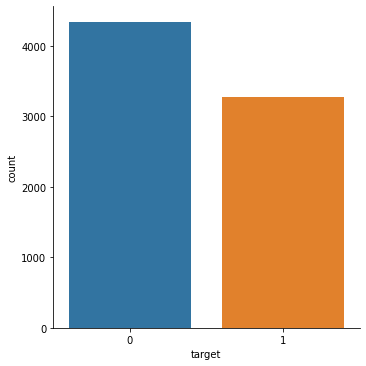

In [11]:
import seaborn as sns
g = sns.catplot(x="target",
                #row="keyword", 
                data=df, kind="count")

###Data Cleaning

Leaving only characters and spaces

In [12]:
#Tokenize the text 
import nltk
nltk.download('punkt')
df['unigrams'] = df['text'].apply(nltk.word_tokenize)
df['unigrams_two'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1).astype(str)

# remove anything but characters and spaces
df['sentences'] = df['unigrams_two'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
#print(df.sentences)

df['splitwords'] = [ nltk.word_tokenize( str(sentence) ) for sentence in df.sentences ]
#print(df.splitwords)

df['word_charter_counts'] = [ len(words) for words in df.splitwords ]
#print(df.word_charter_counts)

df['word_counts'] = [ sentence.count(' ') + 1 for sentence in df.sentences ]
#print(df.word_counts)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
df.head()


,id,keyword,location,text,target,unigrams,unigrams_two,sentences,splitwords,word_charter_counts,word_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #, ea...","['Our', 'Deeds', 'are', 'the', 'Reason', 'of',...",[Our Deeds are the Reason of this earthquake M...,"[[, Our, Deeds, are, the, Reason, of, this, ea...",15,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, ., Canada]","['Forest', 'fire', 'near', 'La', 'Ronge', 'Sas...",[Forest fire near La Ronge Sask Canada],"[[, Forest, fire, near, La, Ronge, Sask, Canad...",9,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...","['All', 'residents', 'asked', 'to', ""'shelter""...",[All residents asked to shelter in place are b...,"[[, All, residents, asked, to, shelter, in, pl...",24,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #, wildfires, evacua...","['13,000', 'people', 'receive', '#', 'wildfire...",[ people receive wildfires evacuation orders i...,"[[, people, receive, wildfires, evacuation, or...",9,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #, ...","['Just', 'got', 'sent', 'this', 'photo', 'from...",[Just got sent this photo from Ruby Alaska as ...,"[[, Just, got, sent, this, photo, from, Ruby, ...",18,16


34


Text(0.5, 1.0, 'Word Charter Counts')

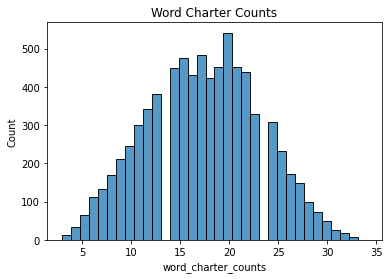

In [32]:
print(max(df.word_charter_counts))
sns.histplot(df['word_charter_counts'].astype(int),
             bins=max(df.word_charter_counts)).set_title('Word Charter Counts')


33


Text(0.5, 1.0, 'Word Counts')

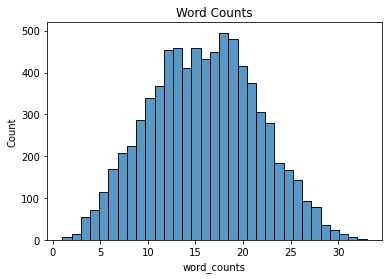

In [33]:
print(max(df.word_counts))
sns.histplot(df['word_counts'].astype(int),
             bins=max(df.word_counts)).set_title('Word Counts')

####Removing non-unicode characters




####Creation of metadata to help train models
1. Length of tweet (words and characters?) - words done
1. Count of total tweets from same location with same keyword? (Higher numbers might be more indicative of a disaster?)
1. TF and TF-IDF for each tweet
1. Number of @ mentions
1. Number of #
1. Number of URLs?